Steps:
 - Load the data (https://yt-project.org/data/)
 - Get the right projection (https://yt-project.org/doc/cookbook/simple_plots.html#simple-projections-weighted)
 - Do the xray output
 - Convert to fits (https://yt-project.org/docs/dev/visualizing/writing_fits_images.html)

## Imports

In [3]:
import yt
import os

## Load the data

In [51]:
data_path = "/home/sam/Documents/ESA/data/datasets/yt/GasSloshing/sloshing_nomag2_hdf5_plt_cnt_0100"
# data_path = "/home/sam/Documents/ESA/data/datasets/yt/TNGHalo/halo_59.hdf5"

In [52]:
# Load the dataset.
ds = yt.load(data_path)

yt : [INFO     ] 2021-07-11 02:01:36,361 Parameters: current_time              = 7.890580019968414e+16
yt : [INFO     ] 2021-07-11 02:01:36,362 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2021-07-11 02:01:36,362 Parameters: domain_left_edge          = [-3.70272e+24 -3.70272e+24 -3.70272e+24]
yt : [INFO     ] 2021-07-11 02:01:36,363 Parameters: domain_right_edge         = [3.70272e+24 3.70272e+24 3.70272e+24]
yt : [INFO     ] 2021-07-11 02:01:36,363 Parameters: cosmological_simulation   = 0.0


# Get Xray (https://yt-project.org/doc/reference/api/yt.fields.xray_emission_fields.html?highlight=xray_emission_fields#yt.fields.xray_emission_fields.XrayEmissivityIntegrator)

In [53]:
yt.add_xray_emissivity_field(ds, 0.5, 2, metallicity=None)

yt : [INFO     ] 2021-07-11 02:01:38,630 Loading emissivity data from ./cloudy_emissivity_v2.h5.
yt : [INFO     ] 2021-07-11 02:01:38,632 X-ray emissivity data calculated with Cloudy 13 rc1 on 12/10/2012 by Britton Smith.
yt : [INFO     ] 2021-07-11 02:01:38,633 X-ray 'cloudy' emissivity data version: 2.
yt : [INFO     ] 2021-07-11 02:01:39,424 Adding xray_emissivity_0.5_2_keV field.
yt : [INFO     ] 2021-07-11 02:01:39,425 Adding xray_luminosity_0.5_2_keV field.
yt : [INFO     ] 2021-07-11 02:01:39,426 Adding xray_photon_emissivity_0.5_2_keV field.


['xray_emissivity_0.5_2_keV',
 'xray_luminosity_0.5_2_keV',
 'xray_photon_emissivity_0.5_2_keV']

In [ ]:
yt

## Get projection

In [42]:
ds.all_data()

YTRegion (halo_59): , center=[4.66905746e+26 4.66905746e+26 4.66905746e+26] cm, left_edge=[0. 0. 0.] cm, right_edge=[9.33811491e+26 9.33811491e+26 9.33811491e+26] cm

In [54]:
print(ds.derived_field_list)

[('flash', 'cell_volume'), ('flash', 'dens'), ('flash', 'divb'), ('flash', 'dx'), ('flash', 'dy'), ('flash', 'dz'), ('flash', 'gpot'), ('flash', 'magp'), ('flash', 'magx'), ('flash', 'magy'), ('flash', 'magz'), ('flash', 'path_element_x'), ('flash', 'path_element_y'), ('flash', 'path_element_z'), ('flash', 'pres'), ('flash', 'temp'), ('flash', 'velx'), ('flash', 'vely'), ('flash', 'velz'), ('flash', 'vertex_x'), ('flash', 'vertex_y'), ('flash', 'vertex_z'), ('flash', 'x'), ('flash', 'y'), ('flash', 'z'), ('gas', 'H_nuclei_density'), ('gas', 'He_nuclei_density'), ('gas', 'alfven_speed'), ('gas', 'angular_momentum_magnitude'), ('gas', 'angular_momentum_x'), ('gas', 'angular_momentum_y'), ('gas', 'angular_momentum_z'), ('gas', 'averaged_density'), ('gas', 'baroclinic_vorticity_magnitude'), ('gas', 'baroclinic_vorticity_x'), ('gas', 'baroclinic_vorticity_y'), ('gas', 'baroclinic_vorticity_z'), ('gas', 'cell_mass'), ('gas', 'cell_volume'), ('gas', 'courant_time_step'), ('gas', 'cutting_plan

yt : [INFO     ] 2021-07-11 02:03:21,187 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:03:21,188 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:03:21,189 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:03:21,190 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:03:21,192 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was depre


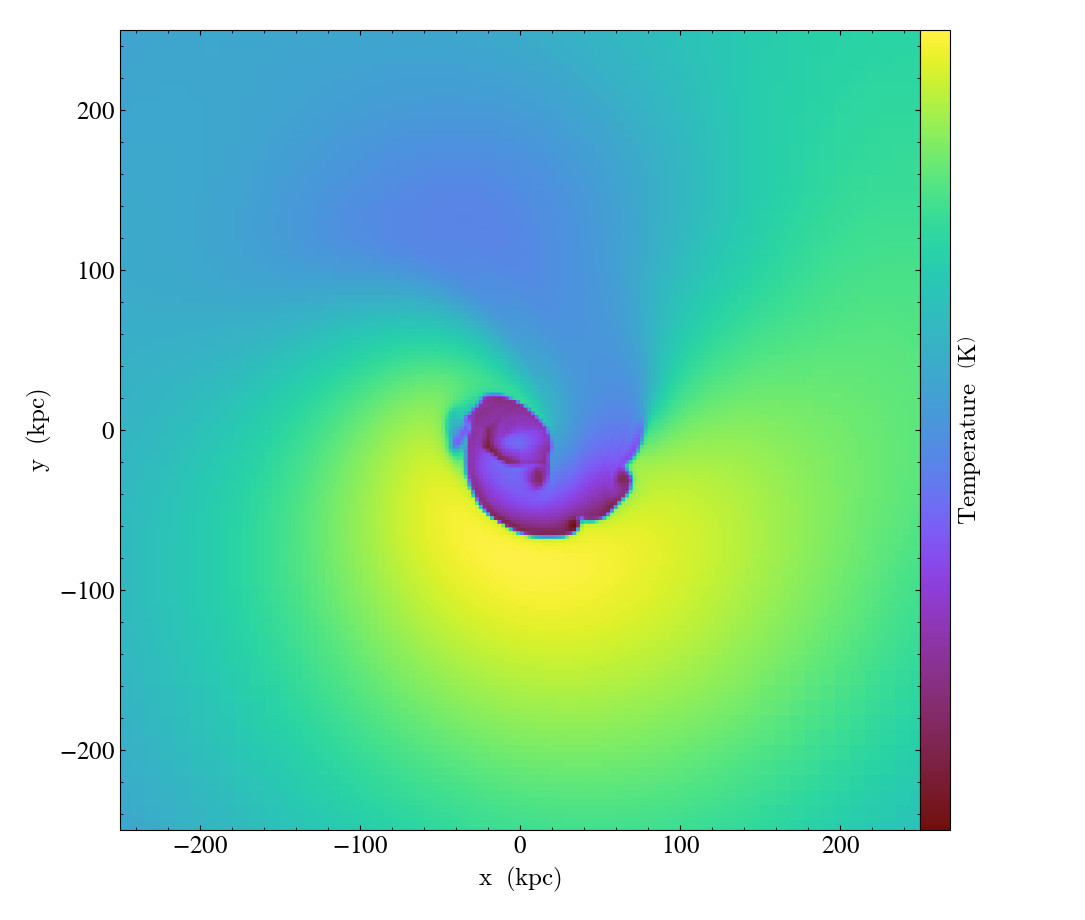

In [57]:
yt.SlicePlot(ds, "z", ('gas', 'temperature'), width=(500.0, "kpc"))

yt : [INFO     ] 2021-07-11 02:04:52,944 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:52,945 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:52,946 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:52,947 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:52,948 Making a fixed resolution buffer of (('gas', 'xray_emissivity')) 800 by 800
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was d


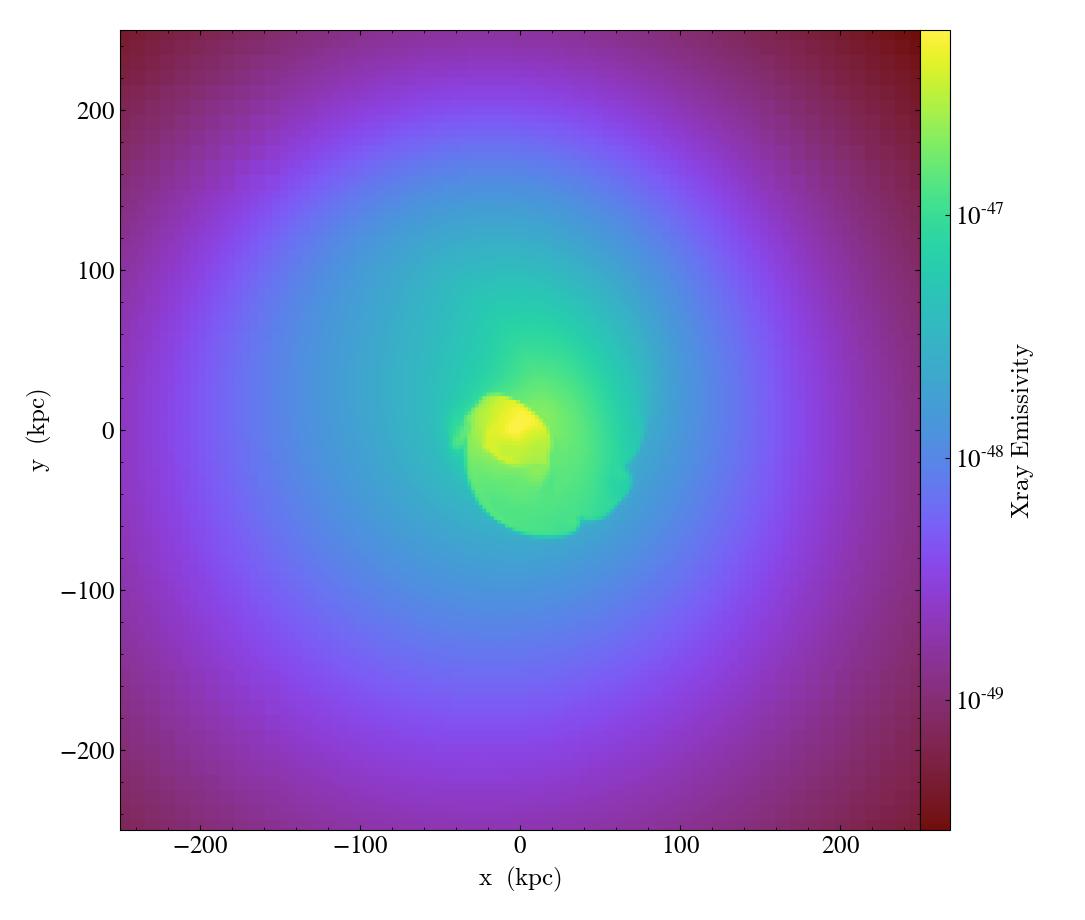

yt : [INFO     ] 2021-07-11 02:04:53,421 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,422 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,423 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,423 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,424 Making a fixed resolution buffer of (('gas', 'xray_emissivity_0.5_2_keV')) 800 by 800
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none func


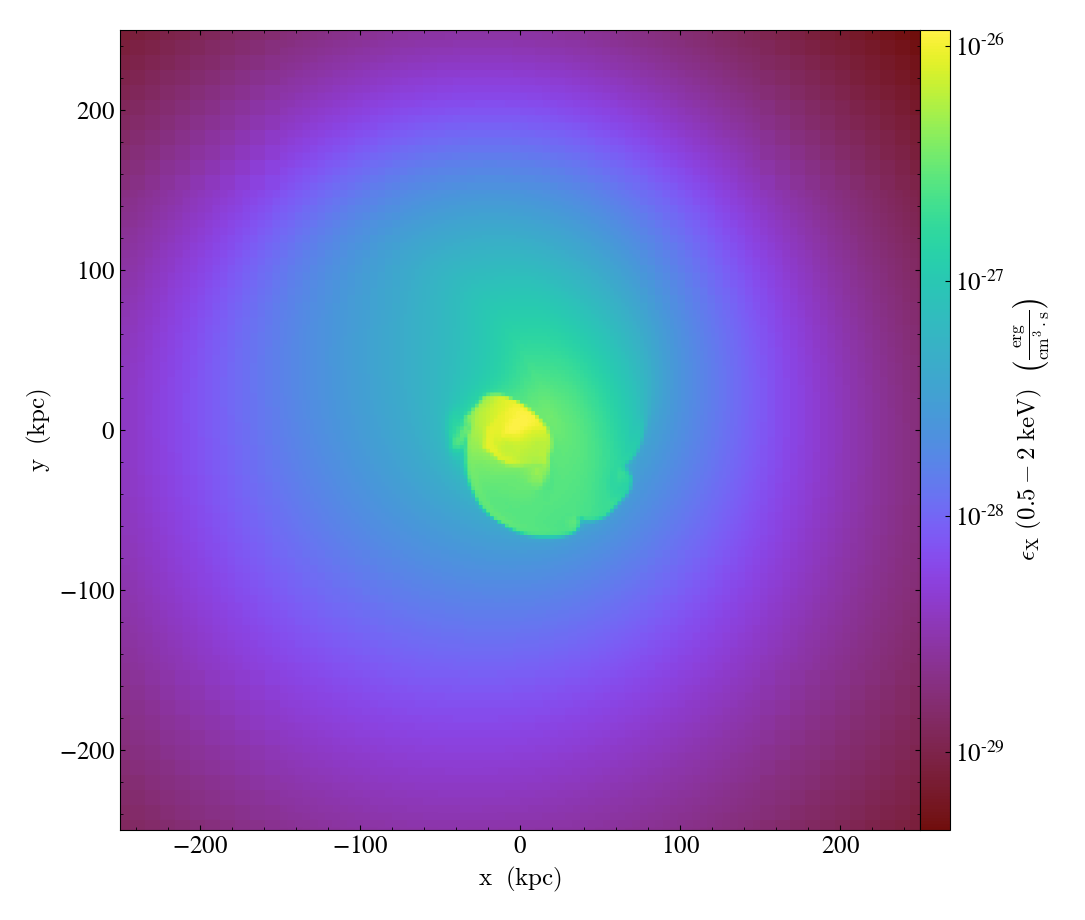

yt : [INFO     ] 2021-07-11 02:04:53,980 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,981 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,981 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,982 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:53,983 Making a fixed resolution buffer of (('gas', 'xray_luminosity_0.5_2_keV')) 800 by 800
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none func


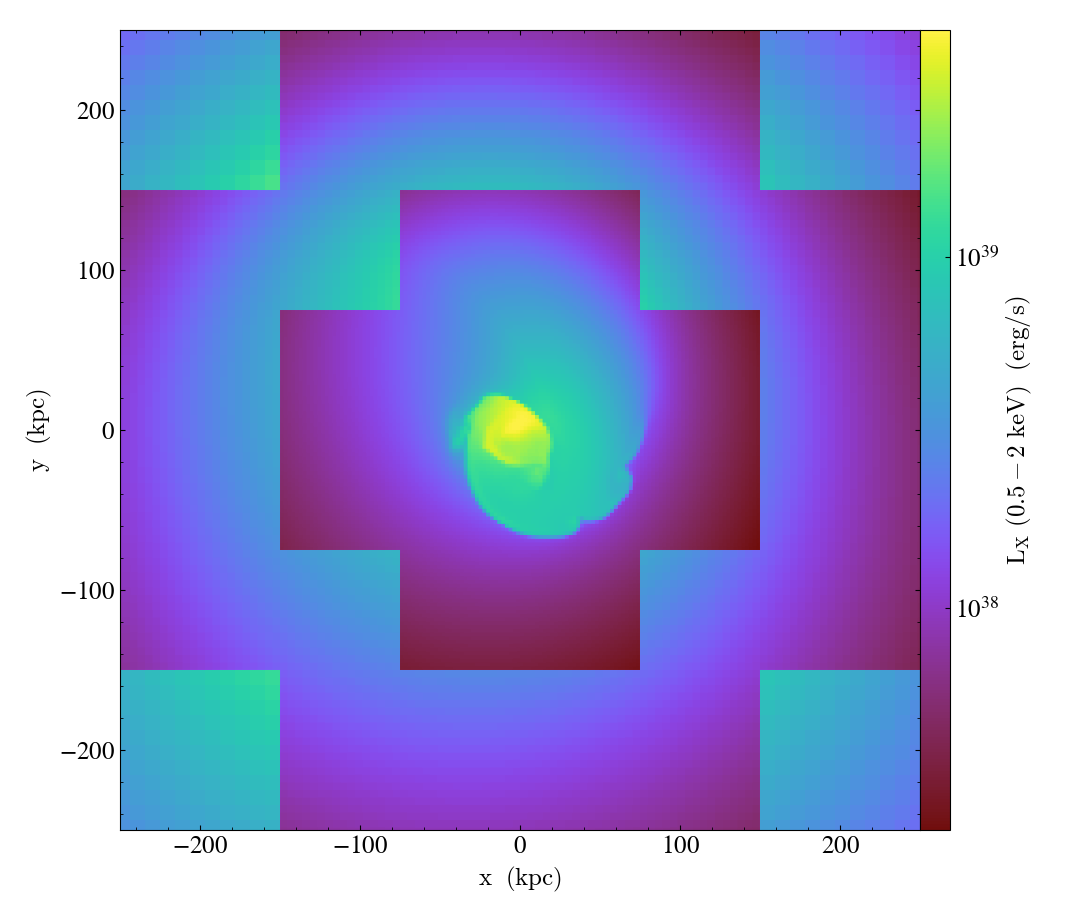

yt : [INFO     ] 2021-07-11 02:04:54,521 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:54,522 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:54,522 xlim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:54,523 ylim = -250.000000 250.000000
yt : [INFO     ] 2021-07-11 02:04:54,524 Making a fixed resolution buffer of (('gas', 'xray_photon_emissivity_0.5_2_keV')) 800 by 800
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_no


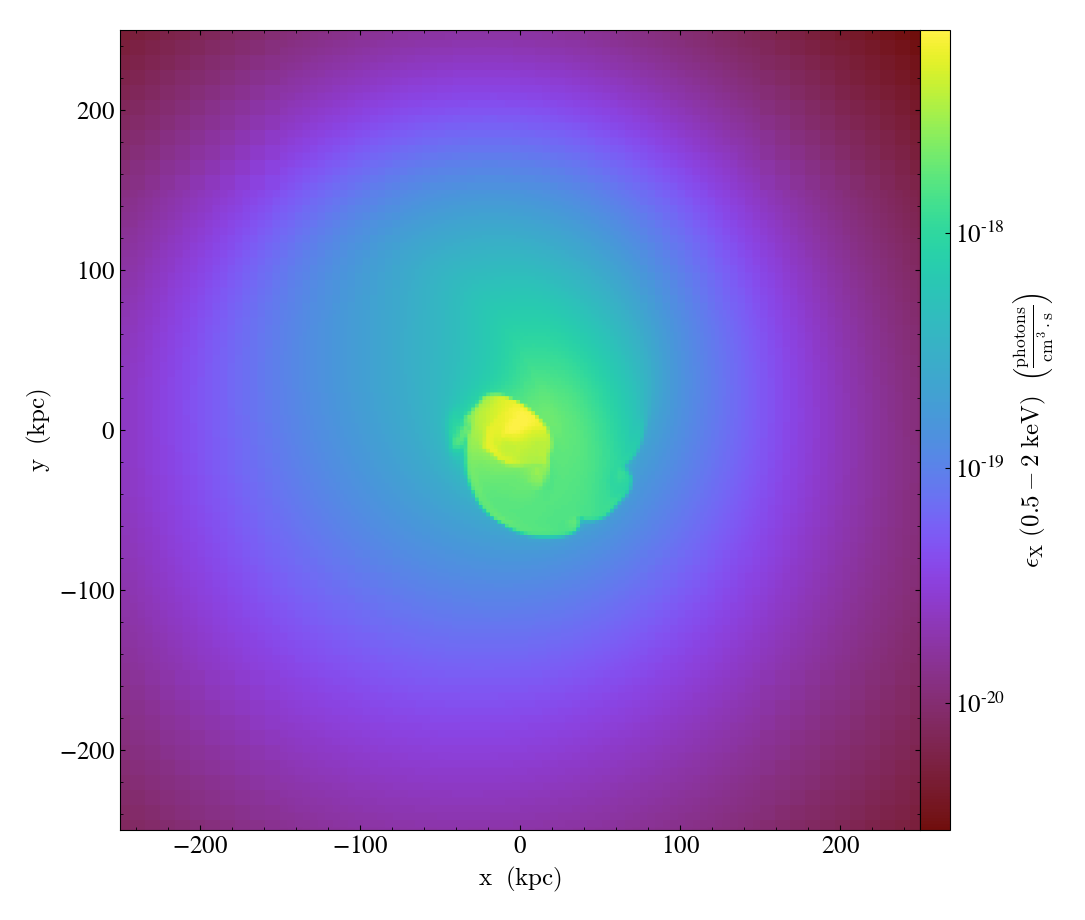

In [61]:
# ('gas', 'xray_emissivity'), ('gas', 'xray_emissivity_0.5_2_keV'), ('gas', 'xray_luminosity_0.5_2_keV'), ('gas', 'xray_photon_emissivity_0.5_2_keV')
yt.SlicePlot(ds, "z", ('gas', 'xray_emissivity'), width=(500.0, "kpc")).show()
yt.SlicePlot(ds, "z", ('gas', 'xray_emissivity_0.5_2_keV'), width=(500.0, "kpc")).show()
yt.SlicePlot(ds, "z", ('gas', 'xray_luminosity_0.5_2_keV'), width=(500.0, "kpc")).show()
yt.SlicePlot(ds, "z", ('gas', 'xray_photon_emissivity_0.5_2_keV'), width=(500.0, "kpc")).show()

yt : [INFO     ] 2021-07-11 01:45:47,293 xlim = -500.000000 500.000000
yt : [INFO     ] 2021-07-11 01:45:47,294 ylim = -500.000000 500.000000
yt : [INFO     ] 2021-07-11 01:45:47,294 xlim = -500.000000 500.000000
yt : [INFO     ] 2021-07-11 01:45:47,295 ylim = -500.000000 500.000000
yt : [INFO     ] 2021-07-11 01:45:47,295 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was depre


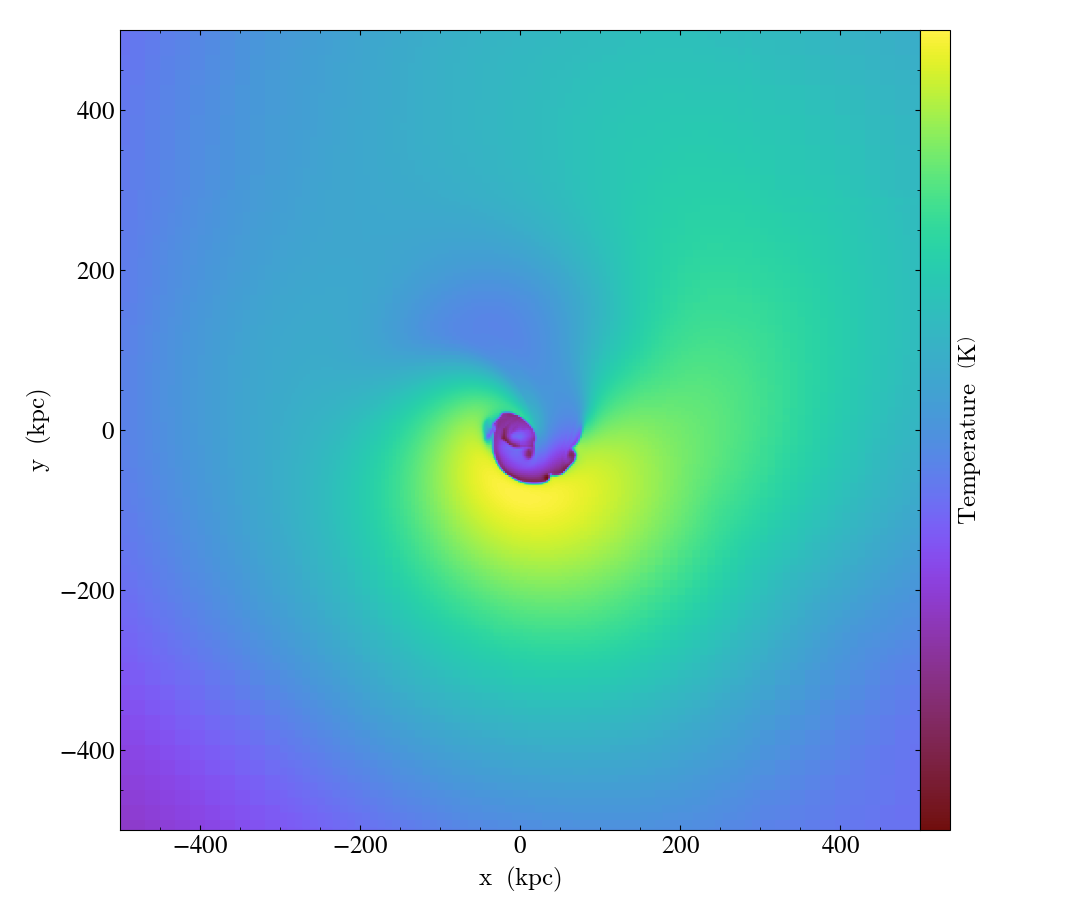

In [23]:
yt.SlicePlot(ds, "z", ("gas", "temperature"), width=(1000.0, "kpc"))

In [ ]:
yt.ProjectionPlot(

    ds, "x", ("gas", "xray_emissivity_0.5_2_keV"), table_type="apec"

)